In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno

In [5]:
#訓練データ読み込み
df_train = pd.read_csv("/Users/takahashihideyuki/dive/diveintocode-ml/Sprint/titanic/train.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1]:
データ辞書
変数	定義	キー
生存	サバイバル	0 =いいえ、1 =はい
pclass	チケットクラス	1 = 1番目、2 = 2番目、3 = 3番目
性別	
年齢	年の年齢	
sibsp: 同胞	タイタニック号に乗っている兄弟/配偶者の数	
パーチ	タイタニック号に乗っている親/子供の数	
チケット	チケット番号	
運賃	旅客運賃	
キャビン	キャビン番号	
乗り出した	乗船港	C =シェルブール、Q =クイーンズタウン、S =サウサンプトン

可変メモ
pclass：社会経済的地位（SES）のプロキシ
1st =上位
2nd =中期
3rd =下位

年齢：1未満の場合、年齢は小数です。年齢が推定される場合、xx.5の形式であるか

sibsp：データセット家族関係をこのように定義します...
兄弟=兄弟、姉妹、継兄弟、義姉妹
配偶者=夫、妻（愛人と婚約者は無視されました）

parch：データセットはこのように家族関係を定義します...
親=母、父子
= daughter、son、stepdaughter、stepson
一部の子供は乳母と一緒に旅行したため、parch = 0でした。

SyntaxError: invalid syntax (<ipython-input-1-cb408a01b3e3>, line 2)

In [6]:
#テストデータ読み込み
df_test = pd.read_csv("/Users/takahashihideyuki/dive/diveintocode-ml/Sprint/titanic/test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


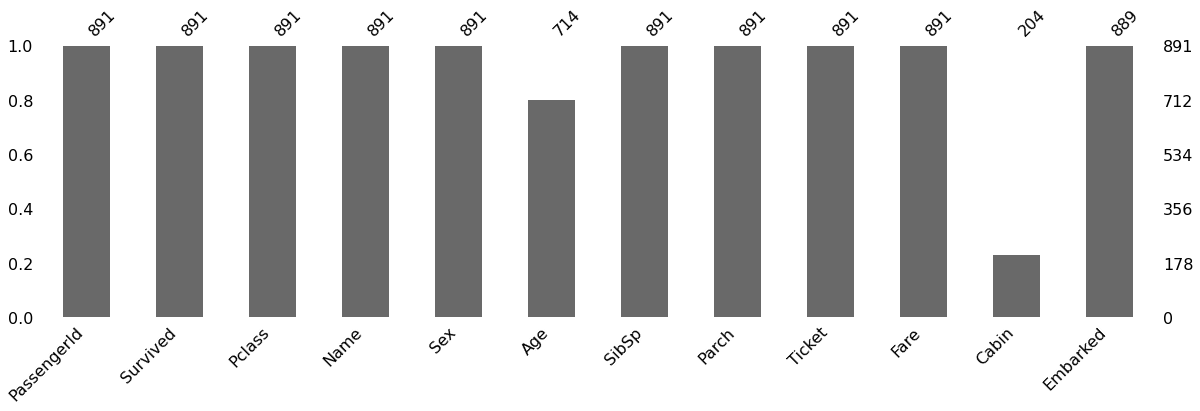

In [10]:
#訓練データ 欠損値確認
msno.bar(df_train, figsize=(20, 5))
plt.show()

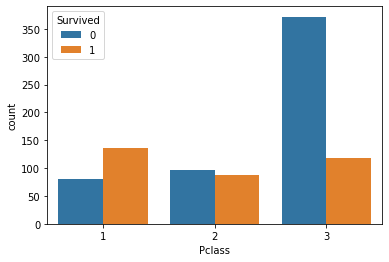

In [17]:
sns.countplot(x="Pclass", hue="Survived",data=df_train)

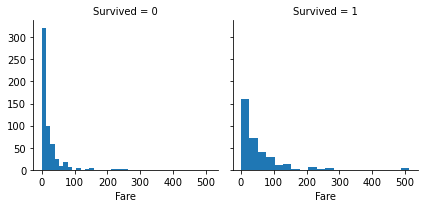

In [31]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

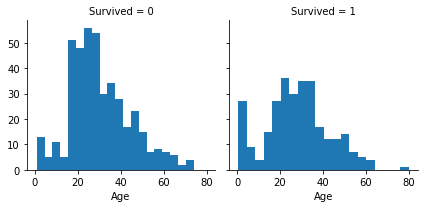

In [21]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

female    233
male      109
Name: Sex, dtype: int64

male      468
female     81
Name: Sex, dtype: int64

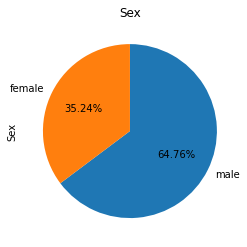

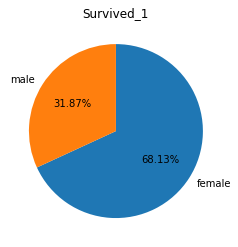

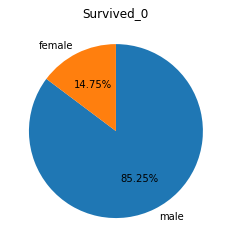

In [36]:
df_TARGET_1 = df_train[df_train["Survived"] == 1]
df_TARGET_0 = df_train[df_train["Survived"] == 0]
gen_1 = df_TARGET_1["Sex"].value_counts()
gen_0 = df_TARGET_0["Sex"].value_counts()
display(gen_1, gen_0)

display(df_train["Sex"].value_counts().plot.pie(title="Sex", startangle=90, counterclock=False, autopct="%1.2f%%"))

fig, ax1 = plt.subplots()
plt.title("Survived_1")
ax1.pie(gen_1, labels=gen_1.index.values, startangle=90, counterclock=False, autopct="%1.2f%%")

fig, ax2 = plt.subplots()
plt.title("Survived_0")
ax2.pie(gen_0, labels=gen_0.index.values, startangle=90, counterclock=False, autopct="%1.2f%%")

plt.show()